# Exercise 1: Implement an MLP Class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
import numpy as np

class MLP:
    """
    Multi-Layer Perceptron with one hidden layer.
    Uses sigmoid activation and backpropagation.
    """

    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.1):
        """
        Initialise the MLP.

        Parameters:
        -----------
        n_inputs : int
        Number of input features
        n_hidden : int
        Number of hidden neurons
        n_outputs : int
        Number of output neurons
        learning_rate : float
        Learning rate for weight updates
        """
        self.learning_rate = learning_rate
        # Input to hidden layer weights (weights_ih) and biases (bias_h)
        self.weights_ih = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
        self.bias_h = np.random.uniform(-0.5, 0.5, n_hidden)

        # Hidden to output layer weights (weights_ho) and biases (bias_o)
        # TODO: add code here for weights_ho and bias_o
        ## Hint: see code for weights_ih and bias_h above
        self.weights_ho = np.random.uniform(-1, 1, (n_hidden, n_outputs))
        self.bias_o = np.random.uniform(-1, 1, n_outputs)

    def sigmoid(self, x):
        """Sigmoid activation function."""
        # TODO: Implement sigmoid
        ## Hint: see Lab 1
        # Clip to avoid overflow in exp
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x) * (1 - σ(x))."""
        # TODO: Implement sigmoid derivative
        ## Hint: see Lab 1
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Forward pass through the network.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Input data

        Returns:
        --------
        array : Output activations
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        # Input to hidden
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)
            
        # Hidden to output
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)

        return self.a_o
     
    def backward(self, X, y):
        """
        Backward pass (backpropagation).

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Input data
        y : array-like, shape (n_samples, n_outputs)
        Target outputs
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        m = X.shape[0]  # Number of samples
            
        # Output layer error
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)
            
        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)
            
        # Update weights and biases
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)
            
        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the network.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Training inputs
        y : array-like, shape (n_samples, n_outputs)
        Training targets
        epochs : int
        Number of training epochs
        verbose : bool
        Print progress if True

        Returns:
        --------
        list : Training loss history
        """
        losses = []

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Compute loss (Mean Squared Error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)

            # Backward pass
            self.backward(X, y)

            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

    def predict(self, X):
        """
        Make predictions.

        Returns the class with highest output activation.
        """
        output = self.forward(X)
        return np.argmax(output, axis=1)
        
print("MLP class defined successfully!")

MLP class defined successfully!


# Exercise 2:  Test the MLP on XOR

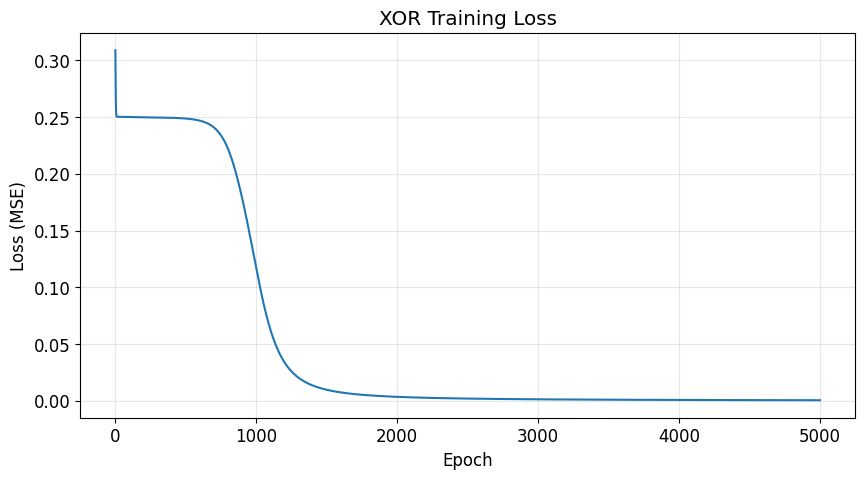


XOR Predictions:
--------------------------------------------------
Input: [0 0] -> Output: 0.0217 -> Rounded: 0 (Expected: 0) ✓
Input: [0 1] -> Output: 0.9823 -> Rounded: 1 (Expected: 1) ✓
Input: [1 0] -> Output: 0.9712 -> Rounded: 1 (Expected: 1) ✓
Input: [1 1] -> Output: 0.0248 -> Rounded: 0 (Expected: 0) ✓


In [3]:
# Define XOR data
# TODO: add code here to define XOR data
## Hint: see Lab 1
import matplotlib.pyplot as plt

X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([[0], [1], [1], [0]])

# Create and train MLP
np.random.seed(42)
mlp_xor = MLP(n_inputs=2, n_hidden=4, n_outputs=1, learning_rate=2.0)
losses_xor = mlp_xor.train(X_xor, y_xor, epochs=5000, verbose=False)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_xor)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('XOR Training Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Test predictions
print("\nXOR Predictions:")
print("-" * 50)

for i in range(len(X_xor)):
    output = mlp_xor.forward(X_xor[i:i+1])
    rounded = round(output[0][0])
    correct = "✓" if rounded == y_xor[i][0] else "✗"
    print(f"Input: {X_xor[i]} -> Output: {output[0][0]:.4f} -> Rounded: {rounded} (Expected: {y_xor[i][0]}) {correct}")

# print("-" * 50)
# accuracy = np.mean([round(mlp_xor.forward(X_xor[i:i+1])[0][0]) == y_xor[i][0] for i in range(len(X_xor))])
# print(f"Accuracy: {accuracy*100:.1f}%")


# Exercise 3: Load and Prepare the Iris Dataset

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Task 3.1: Load and Explore the Data

In [5]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print("Iris Dataset Overview")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"\nClass distribution: {np.bincount(y)}")

Iris Dataset Overview
Features shape: (150, 4)
Target shape: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Class distribution: [50 50 50]


## Task 3.2: Normalise the Data

In [6]:
# Normalise features to [0, 1]
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)
print("Data Normalisation")
print("=" * 50)
print("Before normalisation:")
print(f" Min: {X.min(axis=0)}")
print(f" Max: {X.max(axis=0)}")
print("\nAfter normalisation:")
print(f" Min: {X_normalised.min(axis=0)}")
print(f" Max: {X_normalised.max(axis=0)}")

Data Normalisation
Before normalisation:
 Min: [4.3 2.  1.  0.1]
 Max: [7.9 4.4 6.9 2.5]

After normalisation:
 Min: [0. 0. 0. 0.]
 Max: [1. 1. 1. 1.]


## Task 3.3: One-Hot Encode the Targets

In [7]:
# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print("One-Hot Encoding")
print("=" * 50)
print(f"Original y[:5]: {y[:5]}")
print(f"\nOne-hot y[:5]:")
print(y_onehot[:5])
print(f"\nEncoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]")


One-Hot Encoding
Original y[:5]: [0 0 0 0 0]

One-hot y[:5]:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Encoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]


## Task 3.4: Split into Training and Test Sets

Training MLP on Iris dataset...
Epoch 0: Loss = 0.254918
Epoch 100: Loss = 0.197326
Epoch 200: Loss = 0.162993
Epoch 300: Loss = 0.135118
Epoch 400: Loss = 0.120558
Epoch 500: Loss = 0.112544
Epoch 600: Loss = 0.107175
Epoch 700: Loss = 0.102953
Epoch 800: Loss = 0.099280
Epoch 900: Loss = 0.095880
Epoch 999: Loss = 0.092628


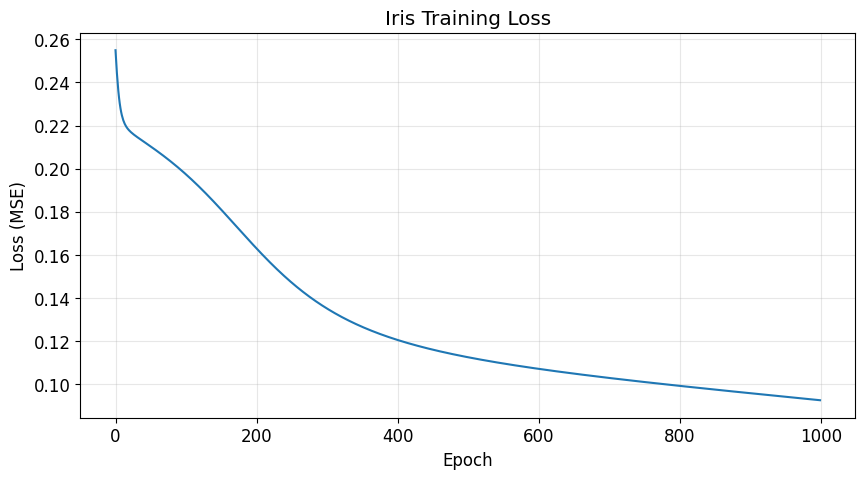

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalise features to [0, 1]
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)

# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_normalised, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Also keep original labels for evaluation
_, _, y_train_labels, y_test_labels = train_test_split(
    X_normalised, y, test_size=0.2, random_state=42, stratify=y
)

# Create MLP: 4 inputs, 8 hidden, 3 outputs, learning rate = 0.5
np.random.seed(42)
mlp_iris = MLP(n_inputs=4, n_hidden=8, n_outputs=3, learning_rate=0.5)

print("Training MLP on Iris dataset...")
print("=" * 50)

# Train the MLP
losses_iris = mlp_iris.train(X_train, y_train, epochs=1000, verbose=True)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_iris)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Iris Training Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Exercise 4: Train the MLP on Iris


## Task 4.1: Create and Train the Network

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalise features to [0, 1]
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)

# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_normalised, y_onehot, test_size=0.2, random_state=42, stratify=y
)
# Also keep original labels for evaluation
_, _, y_train_labels, y_test_labels = train_test_split(
    X_normalised, y, test_size=0.2, random_state=42, stratify=y
)

np.random.seed(42)
# Create MLP: 4 inputs, 8 hidden, 3 outputs, learning rate = 0.5
# TODO: add code here to create MLP
## Hint: see Exercise 2
mlp_iris = MLP(n_inputs=4, n_hidden=8, n_outputs=3, learning_rate=0.5)

print("Training MLP on Iris dataset...")
print("=" * 50)
# Train
losses_iris = mlp_iris.train(X_train, y_train, epochs=1000, verbose=True)

Training MLP on Iris dataset...
Epoch 0: Loss = 0.254918
Epoch 100: Loss = 0.197326
Epoch 200: Loss = 0.162993
Epoch 300: Loss = 0.135118
Epoch 400: Loss = 0.120558
Epoch 500: Loss = 0.112544
Epoch 600: Loss = 0.107175
Epoch 700: Loss = 0.102953
Epoch 800: Loss = 0.099280
Epoch 900: Loss = 0.095880
Epoch 999: Loss = 0.092628


## Task 4.2: Plot Training Loss

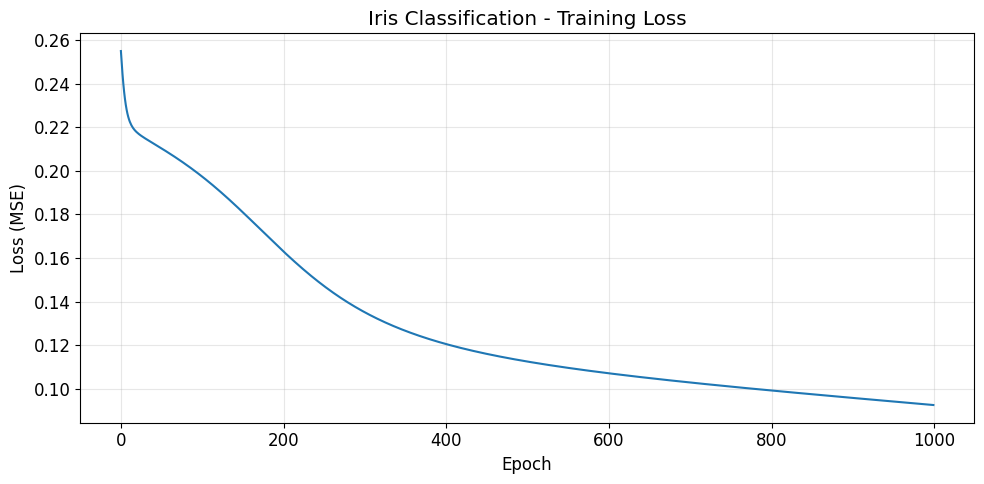

Figure saved as 'iris_training_loss.png'


In [10]:
plt.figure(figsize=(10, 5))
plt.plot(losses_iris)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Iris Classification - Training Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iris_training_loss.png', dpi=150)
plt.show()
print("Figure saved as 'iris_training_loss.png'")

## Task 4.3: Evaluate on Test Set

In [11]:
# Predictions
y_pred = mlp_iris.predict(X_test)
y_true = np.argmax(y_test, axis=1)
# Accuracy
accuracy = np.mean(y_pred == y_true)
print("Test Set Evaluation")
print("=" * 50)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Correct predictions: {np.sum(y_pred == y_true)}/{len(y_true)}")

Test Set Evaluation
Test Accuracy: 86.67%
Correct predictions: 26/30


# Exercise 5: Confusion Matrix (From Scratch)

## Task 5.1: Implement Confusion Matrix

In [12]:
def compute_confusion_matrix(y_true, y_pred, n_classes):
    """
    Compute confusion matrix from scratch.

    Parameters:
    -----------
    y_true : array-like
        True class labels
    y_pred : array-like
        Predicted class labels
    n_classes : int
        Number of classes

    Returns:
    --------
    ndarray : Confusion matrix of shape (n_classes, n_classes)
    """
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    
    return cm

# Compute confusion matrix
cm = compute_confusion_matrix(y_true, y_pred, n_classes=3)
print("Confusion Matrix (from scratch)")
print("=" * 50)
print(cm)
print(f"\nRows = Actual, Columns = Predicted")
print(f"Diagonal = Correct predictions")

Confusion Matrix (from scratch)
[[10  0  0]
 [ 0  6  4]
 [ 0  0 10]]

Rows = Actual, Columns = Predicted
Diagonal = Correct predictions


## Task 5.2: Verify with sklearn

In [13]:
from sklearn.metrics import confusion_matrix as sklearn_cm, classification_report

# sklearn's confusion matrix (should match ours)
cm_sklearn = sklearn_cm(y_true, y_pred)

print("Verification with sklearn")
print("=" * 50)
print("Our confusion matrix:")
print(cm)
print("\nsklearn confusion matrix:")
print(cm_sklearn)
print(f"\nMatrices match: {np.array_equal(cm, cm_sklearn)}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=iris.target_names))

Verification with sklearn
Our confusion matrix:
[[10  0  0]
 [ 0  6  4]
 [ 0  0 10]]

sklearn confusion matrix:
[[10  0  0]
 [ 0  6  4]
 [ 0  0 10]]

Matrices match: True

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.60      0.75        10
   virginica       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30



## Task 5.3: Visualise the Confusion Matrix

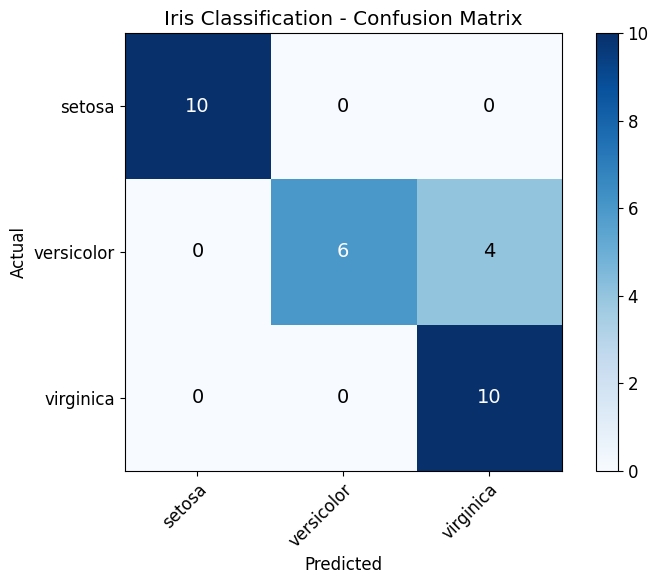

Figure saved as 'iris_confusion_matrix.png'


In [14]:
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    """
    Plot confusion matrix as a heatmap.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           title=title,
           ylabel='Actual',
           xlabel='Predicted')
    
    # Rotate tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=14)
    
    plt.tight_layout()
    return fig

# Plot
fig = plot_confusion_matrix(cm, iris.target_names, "Iris Classification - Confusion Matrix")
plt.savefig('iris_confusion_matrix.png', dpi=150)
plt.show()
print("Figure saved as 'iris_confusion_matrix.png'")

## Task 5.4: Compute Performance Metrics

In [15]:
def compute_metrics(cm):
    """Compute accuracy, precision, and recall from confusion matrix."""
    n_classes = cm.shape[0]
    
    # Accuracy: sum of diagonal / total
    accuracy = np.trace(cm) / np.sum(cm)
    
    # Per-class precision and recall
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    
    for i in range(n_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp  # Column sum minus TP
        fn = np.sum(cm[i, :]) - tp  # Row sum minus TP
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return accuracy, precision, recall

# Compute metrics
accuracy, precision, recall = compute_metrics(cm)
print("Performance Metrics")
print("=" * 50)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"\nPer-class metrics:")
print(f"{'Class':<15} {'Precision':<12} {'Recall':<12}")
print("-" * 39)
for i, name in enumerate(iris.target_names):
    print(f"{name:<15} {precision[i]*100:>8.2f}% {recall[i]*100:>8.2f}%")

Performance Metrics
Overall Accuracy: 86.67%

Per-class metrics:
Class           Precision    Recall      
---------------------------------------
setosa            100.00%   100.00%
versicolor        100.00%    60.00%
virginica          71.43%   100.00%


# Exercise 6: Compare with sklearn's MLPClassifier

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# sklearn MLP
sklearn_mlp = MLPClassifier(
    hidden_layer_sizes=(8,), # One hidden layer with 8 neurons
    activation='logistic', # Sigmoid activation
    solver='sgd', # Stochastic gradient descent
    learning_rate_init=0.5,
    max_iter=1000,
    random_state=42
)
# Train (sklearn receives class labels, not one-hot)
sklearn_mlp.fit(X_train, y_train_labels)

# Evaluate
sklearn_pred = sklearn_mlp.predict(X_test)
sklearn_accuracy = accuracy_score(y_test_labels, sklearn_pred)

print("Comparison: Our MLP vs sklearn MLPClassifier")
print("=" * 50)
print(f"Our MLP Accuracy: {accuracy * 100:.2f}%")
print(f"sklearn MLP Accuracy: {sklearn_accuracy * 100:.2f}%")
print(f"\nsklearn typically achieves higher accuracy due to its optimisations.")

Comparison: Our MLP vs sklearn MLPClassifier
Our MLP Accuracy: 86.67%
sklearn MLP Accuracy: 96.67%

sklearn typically achieves higher accuracy due to its optimisations.
